In [25]:
import yt
yt.enable_parallelism()

import panel as pn

In [26]:
diag_name = 'plt'
plotfile = './diags/plotfiles/{}??????'.format(diag_name)
ts = yt.load(plotfile)

In [17]:
plotfile = './diags/plotfiles/plt000000'
ds = yt.load(plotfile)


yt : [INFO     ] 2022-05-17 16:26:34,012 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-17 16:26:34,013 Parameters: domain_dimensions         = [32 64 64]
yt : [INFO     ] 2022-05-17 16:26:34,014 Parameters: domain_left_edge          = [     0.         -63647.09434703 -63647.09434703]
yt : [INFO     ] 2022-05-17 16:26:34,015 Parameters: domain_right_edge         = [63647.09434703 63647.09434703 63647.09434703]


'plt000000'

In [22]:
_check = 1
if _check:
    from icecream import ic
    ds = ts[0]
    ic(ds.time_unit)
    ic(ds.current_time)
    
    # ic(ds.field_list)
    # ic(ds.derived_field_list)
    

yt : [INFO     ] 2022-05-17 16:31:46,687 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-17 16:31:46,688 Parameters: domain_dimensions         = [32 64 64]
yt : [INFO     ] 2022-05-17 16:31:46,689 Parameters: domain_left_edge          = [     0.         -63647.09434703 -63647.09434703]
yt : [INFO     ] 2022-05-17 16:31:46,690 Parameters: domain_right_edge         = [63647.09434703 63647.09434703 63647.09434703]
ic| ds.time_unit: unyt_quantity(1., 's')
ic| ds.current_time: unyt_quantity(0., 'code_time')


yt : [INFO     ] 2022-05-17 16:43:04,004 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-17 16:43:04,005 Parameters: domain_dimensions         = [32 64 64]
yt : [INFO     ] 2022-05-17 16:43:04,006 Parameters: domain_left_edge          = [     0.         -63647.09434703 -63647.09434703]
yt : [INFO     ] 2022-05-17 16:43:04,007 Parameters: domain_right_edge         = [63647.09434703 63647.09434703 63647.09434703]
yt : [INFO     ] 2022-05-17 16:43:05,898 xlim = 0.000000 63647.094347
yt : [INFO     ] 2022-05-17 16:43:05,899 ylim = -63647.094347 63647.094347
yt : [INFO     ] 2022-05-17 16:43:05,899 xlim = 0.000000 63647.094347
yt : [INFO     ] 2022-05-17 16:43:05,900 ylim = -63647.094347 63647.094347
yt : [INFO     ] 2022-05-17 16:43:05,901 Making a fixed resolution buffer of (('boxlib', 'Bx')) 800 by 800
yt : [INFO     ] 2022-05-17 16:43:05,907 Making a fixed resolution buffer of (('boxlib', 'By')) 800 by 800
yt : [INFO     ] 2022-05-17 16:43:05,911 Making a fixed reso

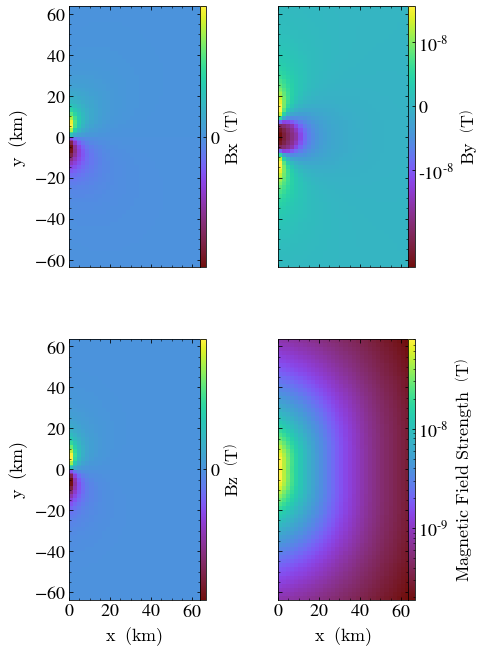

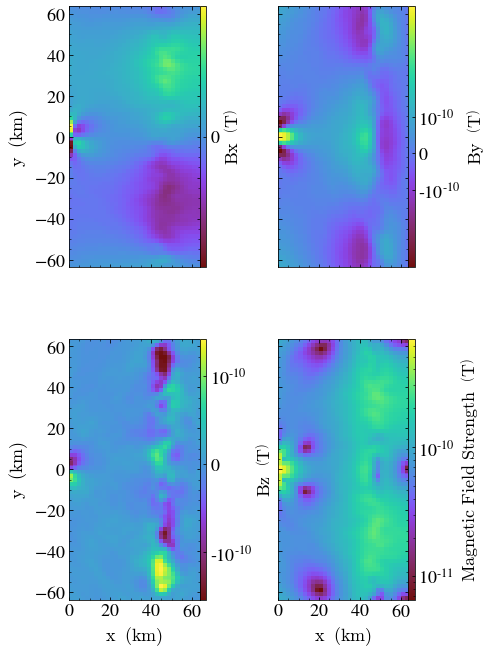

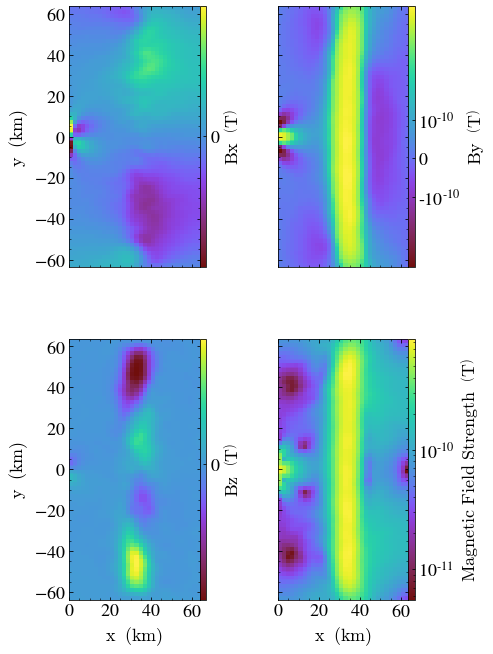

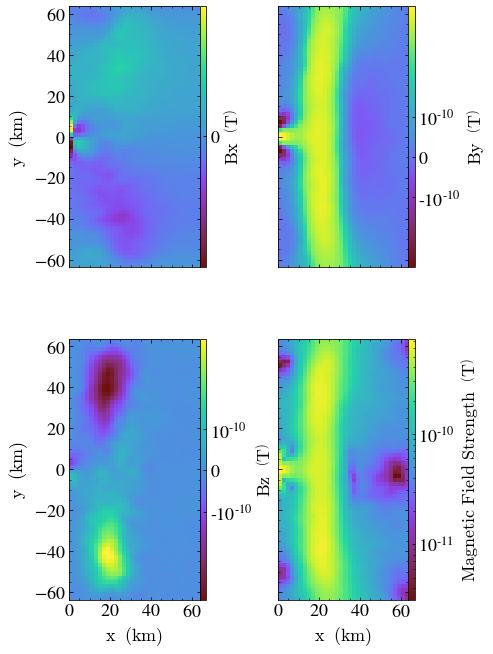

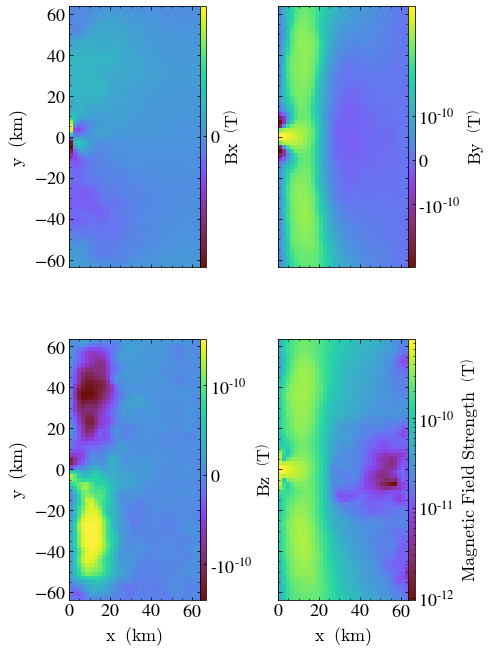

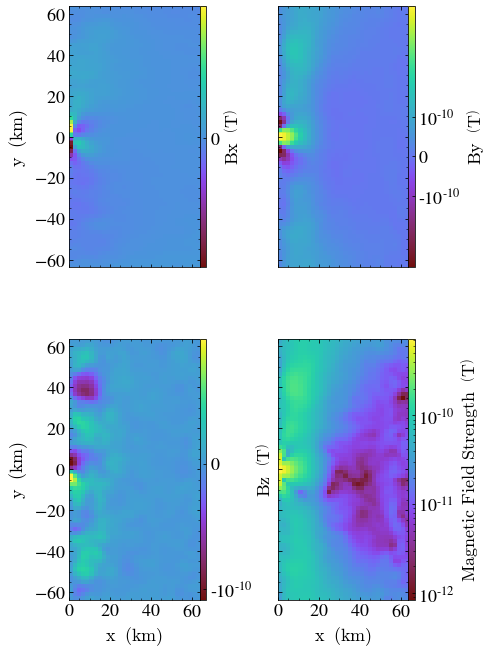

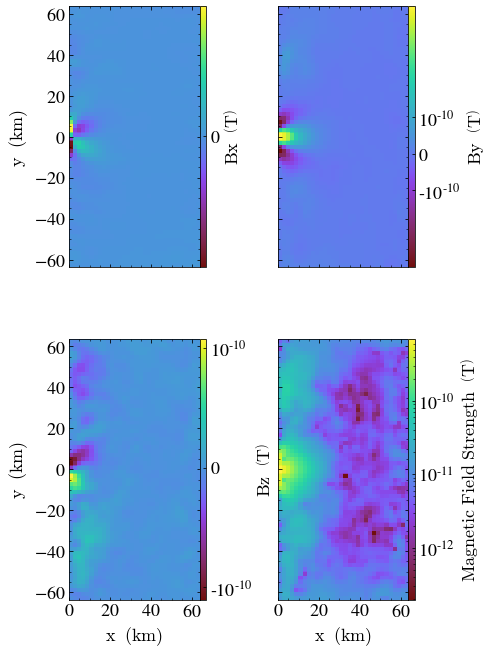

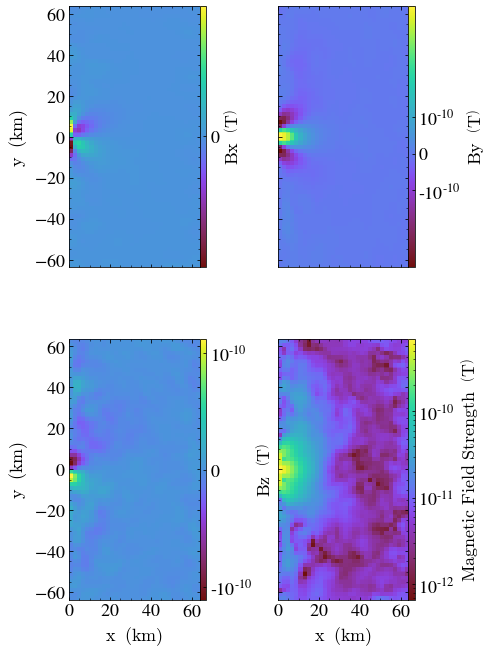

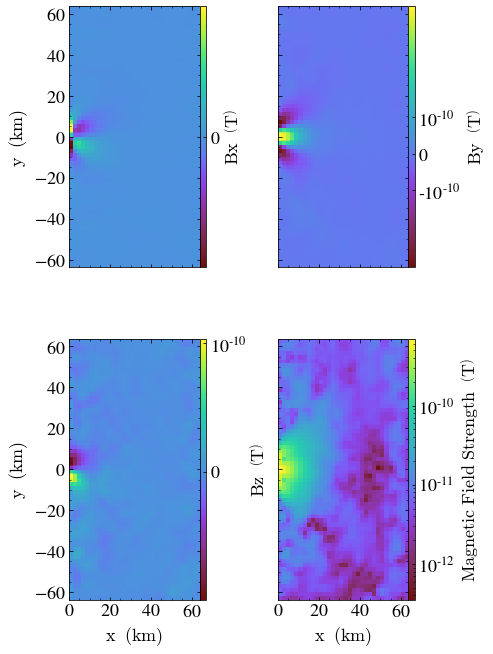

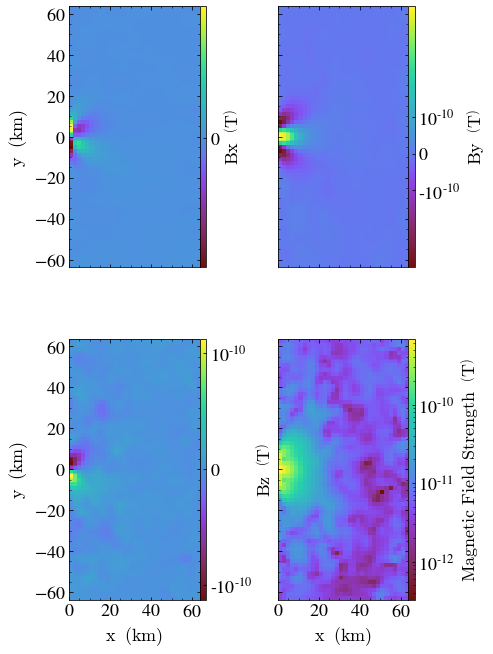

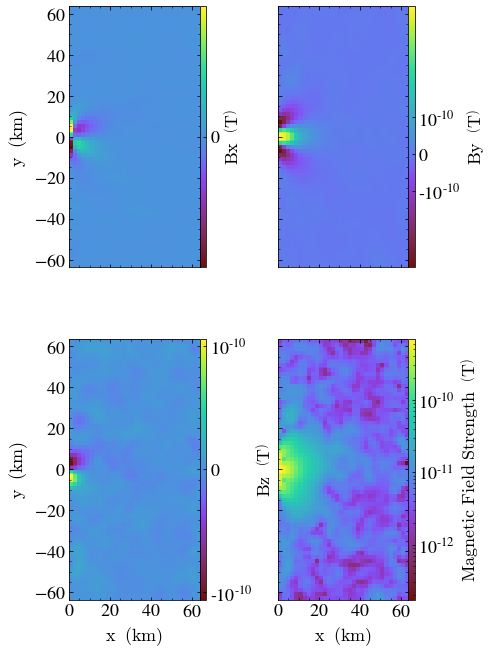

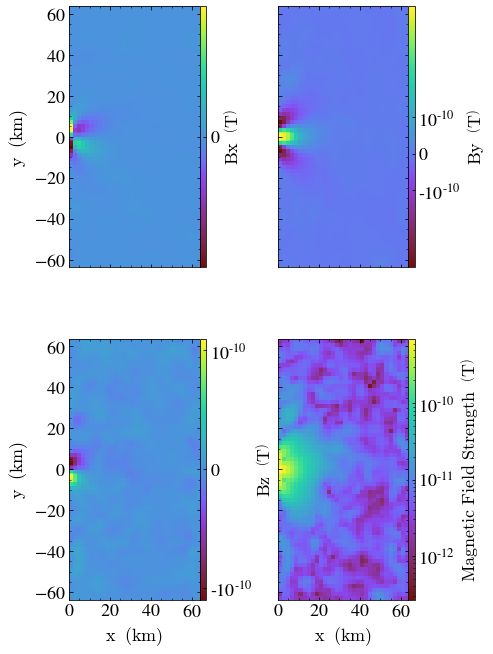

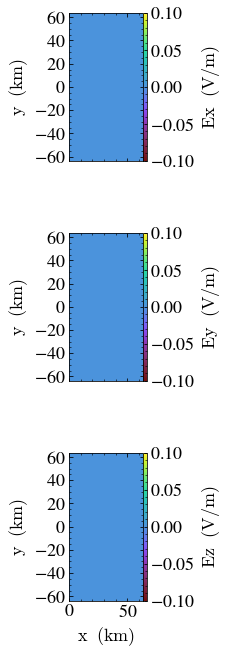

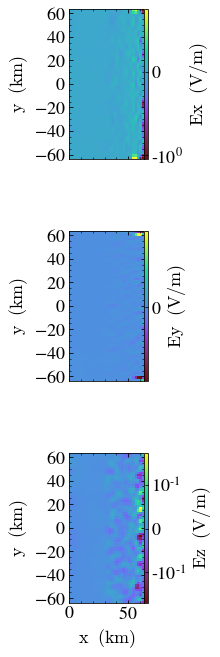

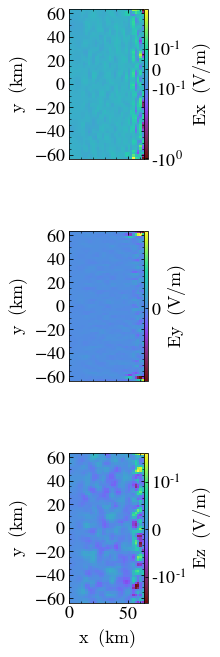

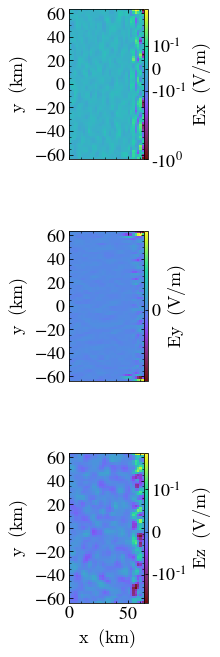

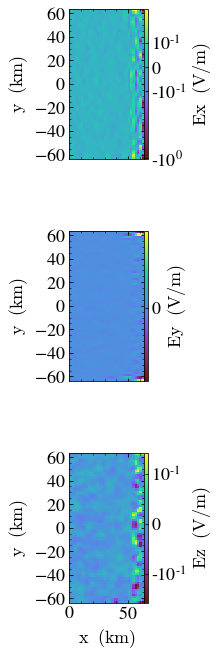

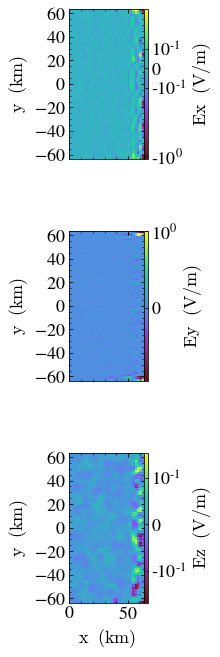

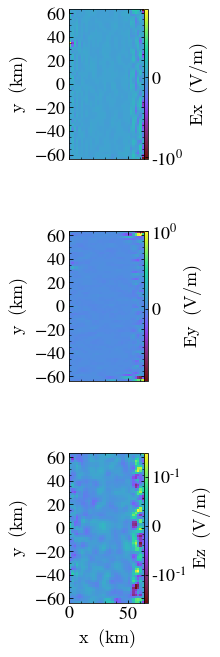

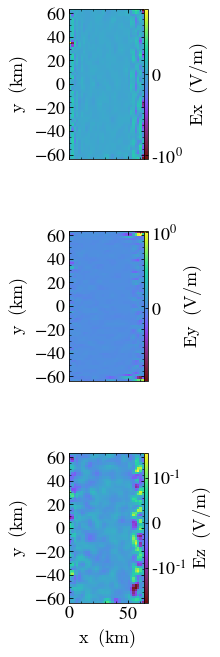

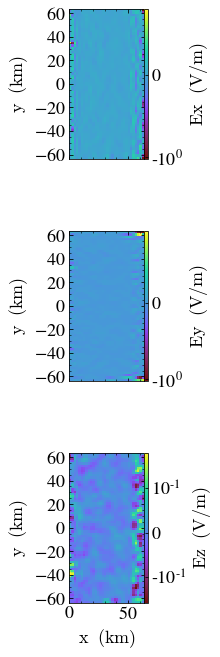

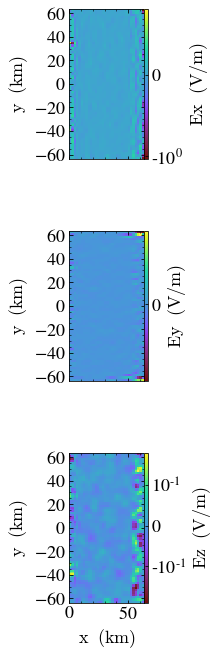

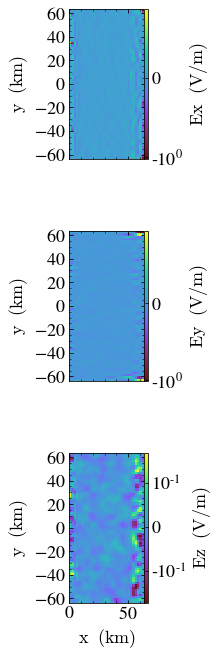

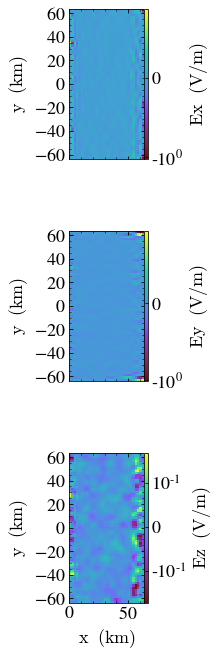

In [27]:
def _SlicePlot(fields,name, _Multipanel = False, nrows_ncols = None, ):
    _Multipanel = True
    for ds in ts.piter():
        slc = yt.SlicePlot(ds, "z", fields,origin="native") # Create a sliceplot object
        if _Multipanel:
            fig = slc.export_to_mpl_figure(nrows_ncols)
            fig.tight_layout()
            fig.savefig('figures/{}_{}.png'.format(str(ds), name))
        else:
            slc.save('figures/')

fields = [('boxlib','Bx'),('boxlib','By'),('boxlib','Bz'),('mesh', 'magnetic_field_strength'),]
_SlicePlot(fields,'B', _Multipanel = True, nrows_ncols = (2,2))

fields = [('boxlib','Ex'),('boxlib','Ey'),('boxlib','Ez'),]
_SlicePlot(fields,'E', _Multipanel = True, nrows_ncols = (3,1))


yt : [INFO     ] 2022-05-17 16:30:03,225 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-17 16:30:03,225 Parameters: domain_dimensions         = [32 64 64]
yt : [INFO     ] 2022-05-17 16:30:03,226 Parameters: domain_left_edge          = [     0.         -63647.09434703 -63647.09434703]
yt : [INFO     ] 2022-05-17 16:30:03,227 Parameters: domain_right_edge         = [63647.09434703 63647.09434703 63647.09434703]
yt : [INFO     ] 2022-05-17 16:30:05,105 xlim = -63647.094347 63647.094347
yt : [INFO     ] 2022-05-17 16:30:05,106 ylim = -63647.094347 63647.094347
yt : [INFO     ] 2022-05-17 16:30:05,106 xlim = -63647.094347 63647.094347
yt : [INFO     ] 2022-05-17 16:30:05,107 ylim = -63647.094347 63647.094347
yt : [INFO     ] 2022-05-17 16:30:05,108 Making a fixed resolution buffer of (('boxlib', 'rho')) 800 by 800
yt : [INFO     ] 2022-05-17 16:30:05,114 Making a fixed resolution buffer of (('boxlib', 'rho_e-')) 800 by 800
yt : [INFO     ] 2022-05-17 16:30:05,119 Maki

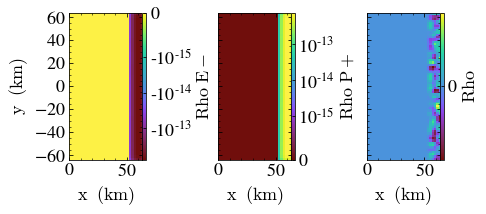

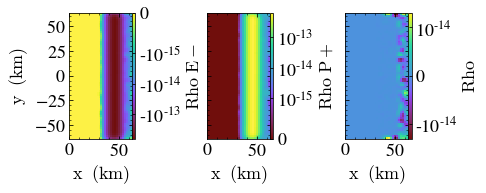

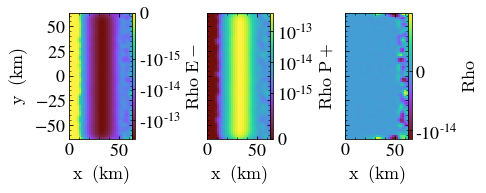

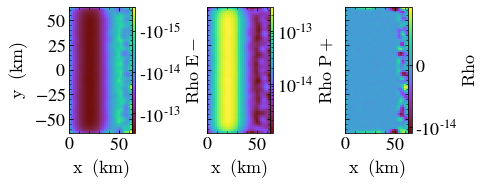

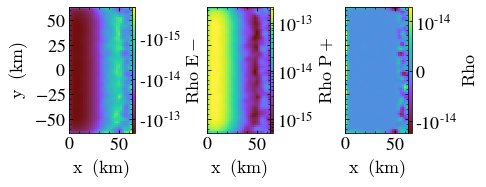

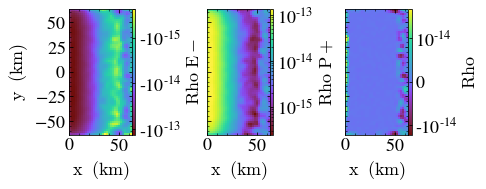

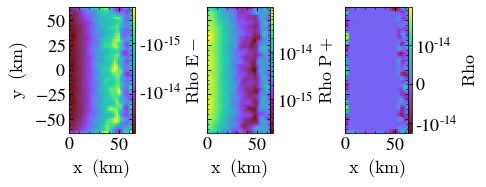

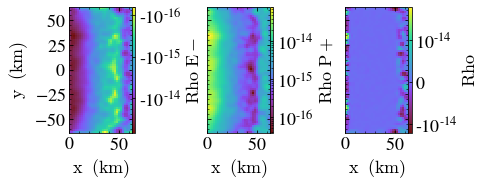

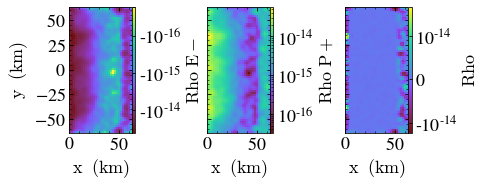

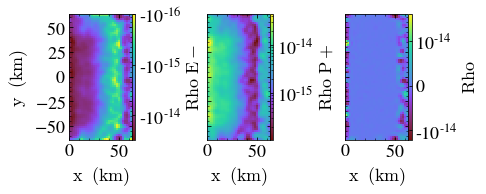

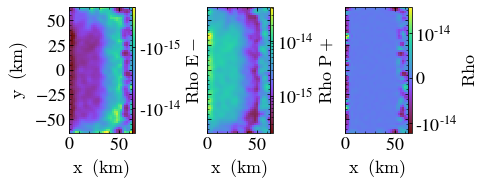

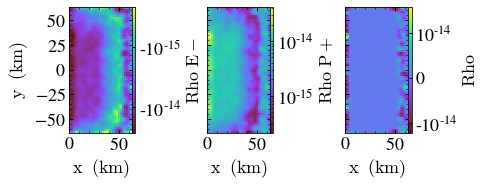

In [19]:
fields = [('boxlib','rho_e-'),('boxlib','rho_p+'), ('boxlib','rho')]
cuts = ["x", "y", "z"]

_Multipanel = True
_panel = False
nrows_ncols = (1, 3)
for ds in ts:
    for direction in cuts:
        slc = yt.SlicePlot(ds, direction, fields ,origin="native")
    if _Multipanel:
        fig = slc.export_to_mpl_figure(nrows_ncols)
        fig.tight_layout()
        fig.savefig('figures/{}_Slice_{}_rho.png'.format(str(ds),direction))
    else:
        slc.save('figures/')
    if _panel:
        mpl_pane = pn.pane.Matplotlib(fig, dpi=144)
        pn.Row(mpl_pane.controls(jslink=True), mpl_pane)

In [19]:
for ds in ts:
    p=  yt.ParticlePhasePlot( ds.all_data(), ('e-','particle_position_x'), ('e-','particle_position_y'), ('e-','particle_weight'))
    p.save('figures/')

    p=  yt.ParticlePhasePlot( ds.all_data(), ('e-','particle_position_x'), ('e-','particle_position_z'), ('e-','particle_weight'))
    p.save('figures/')

yt : [INFO     ] 2022-05-17 14:13:00,254 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-17 14:13:00,255 Parameters: domain_dimensions         = [32 64 64]
yt : [INFO     ] 2022-05-17 14:13:00,256 Parameters: domain_left_edge          = [     0.         -63647.09434703 -63647.09434703]
yt : [INFO     ] 2022-05-17 14:13:00,257 Parameters: domain_right_edge         = [63647.09434703 63647.09434703 63647.09434703]
yt : [INFO     ] 2022-05-17 14:13:07,227 Saving plot figures/plt000000_2d-Profile_particle_position_x_particle_position_y_particle_weight.png
yt : [INFO     ] 2022-05-17 14:13:12,775 Saving plot figures/plt000000_2d-Profile_particle_position_x_particle_position_z_particle_weight.png
yt : [INFO     ] 2022-05-17 14:13:13,276 Parameters: current_time              = 0.03182198319564898
yt : [INFO     ] 2022-05-17 14:13:13,276 Parameters: domain_dimensions         = [32 64 64]
yt : [INFO     ] 2022-05-17 14:13:13,277 Parameters: domain_left_edge          = [     